In [1]:
from sympy import *
import numpy as np
from sympy.plotting import plot3d,plot
from sympy import init_printing
#import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

In [2]:
Variables=symbols("x1 y1 z1 x2 y2 z2")
x1,y1,z1,x2,y2,z2=Variables
Time=symbols("t")
t=Time
Parameters=symbols("sigma beta rho a b c eps")
sigma,beta,rho,a,b,c,eps=Parameters

In [3]:
def VectorDivergence(vector,variables):
    D = []
    for vec in vector:
        row = []
        for var in variables:
            row.append(diff(vec,var))
        D.append(row)
    return Matrix(D)

### Lorenz system

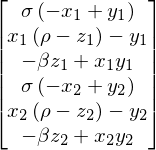

In [4]:
F=Matrix([sigma*(y1-x1),x1*(rho-z1)-y1,x1*y1-beta*z1,
          sigma*(y2-x2),x2*(rho-z2)-y2,x2*y2-beta*z2])
F

In [5]:
zeta=Matrix([0,0,0,
             0,0,0])
#zeta=eps*zeta
zeta

### Synchrony

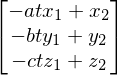

In [6]:
phi=Matrix([(x2-a*t*x1),(y2-b*t*y1),(z2-c*t*z1)])
phi

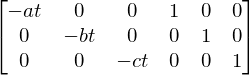

In [7]:
N=VectorDivergence(phi,Variables)
N

In [8]:
on_manifold = [(x2,a*t*x1),(y2,b*t*y1),(z2,c*t*z1)]

## Invariance

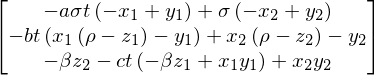

In [9]:
# NF=(N*(F+zeta)).subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
# simplify(NF)
NF=N*(F+zeta)
NF
#simplify(NF)

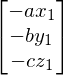

In [10]:
dPhi=diff(phi,Time)
dPhi

In [27]:
eqn=(NF+dPhi)
simplify(eqn)

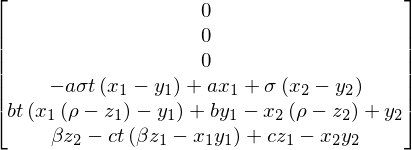

In [12]:
zeta[3]=-(eqn)[0]
zeta[4]=-(eqn)[1]
zeta[5]=-(eqn)[2]
simplify(zeta)

In [13]:
#zeta = zeta.subs(on_manifold)

In [14]:
NF=N*(F+zeta)#.subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
simplify(NF)
simplify((NF+dPhi).subs(on_manifold))

### Stability

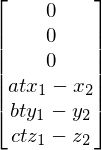

In [15]:
chi=Matrix([0,0,0,
            -(x2-a*t*x1),-(y2-b*t*y1),-(z2-c*t*z1)])
chi

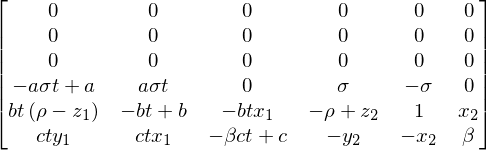

In [16]:
del_zeta=VectorDivergence(zeta,Variables)
del_zeta

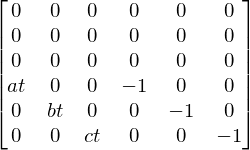

In [17]:
del_chi=VectorDivergence(chi,Variables)
del_chi

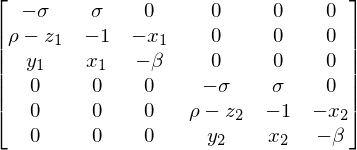

In [18]:
del_F=VectorDivergence(F,Variables)
del_F

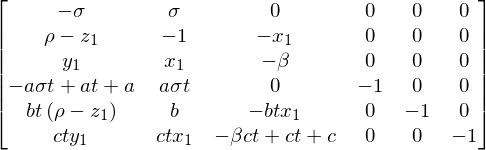

In [19]:
(del_F+del_zeta+del_chi)

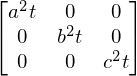

In [20]:
diff(N,t)*N.transpose()

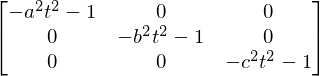

In [21]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac.subs([(x2,a*t*x1),(y2,b*t*y1),(z2,c*t*z1)])

In [26]:
simplify(list(Jac.eigenvals().keys()))

### coupling

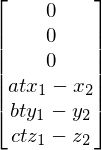

In [23]:
chi

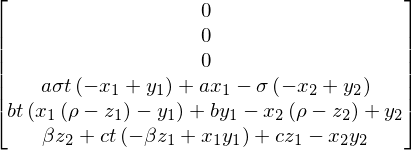

In [24]:
zeta

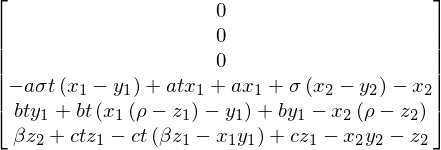

In [25]:
simplify((chi+zeta))#.subs([(x2,a*t*x1),(y2,b*t*y1),(z2,c*t*z1)])))

### conclusion

* Lorenz system dont go along nwith temporal synchronisation
    - either annihilate original system
    - or deal with incomputable eigenvalue